**NAMA : WIDIAWATI SIHALOHO**

**NIM : 24060122120037**

**LAB C-1**

**TUGAS PRAKTIKUM ML KE 1**

**Library** ini digunakan untuk memproses data, membangun model machine learning, mengevaluasi model, dan memvisualisasikan hasilnya.

In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


**Load Dataset**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset = pd.read_csv(url, header = None)

**Melihat Dimensi Dataset**

In [ ]:
print (dataset.shape)

(150, 5)


**Melihat Isi Dataset**

In [ ]:
print(dataset.head(20))

      0    1    2    3            4
0   5.1  3.5  1.4  0.2  Iris-setosa
1   4.9  3.0  1.4  0.2  Iris-setosa
2   4.7  3.2  1.3  0.2  Iris-setosa
3   4.6  3.1  1.5  0.2  Iris-setosa
4   5.0  3.6  1.4  0.2  Iris-setosa
5   5.4  3.9  1.7  0.4  Iris-setosa
6   4.6  3.4  1.4  0.3  Iris-setosa
7   5.0  3.4  1.5  0.2  Iris-setosa
8   4.4  2.9  1.4  0.2  Iris-setosa
9   4.9  3.1  1.5  0.1  Iris-setosa
10  5.4  3.7  1.5  0.2  Iris-setosa
11  4.8  3.4  1.6  0.2  Iris-setosa
12  4.8  3.0  1.4  0.1  Iris-setosa
13  4.3  3.0  1.1  0.1  Iris-setosa
14  5.8  4.0  1.2  0.2  Iris-setosa
15  5.7  4.4  1.5  0.4  Iris-setosa
16  5.4  3.9  1.3  0.4  Iris-setosa
17  5.1  3.5  1.4  0.3  Iris-setosa
18  5.7  3.8  1.7  0.3  Iris-setosa
19  5.1  3.8  1.5  0.3  Iris-setosa


**EVALUASI ALGORITMA**

**1. Membuat Validasi Dataset**

In [ ]:
#Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size,random_state=seed)

Kode ini memisahkan dataset menjadi data pelatihan (X_train, Y_train) sebanyak 80% dan data validasi (X_validation, Y_validation) sebanyak 20%. Data pelatihan digunakan untuk membangun model, sementara data validasi digunakan untuk mengevaluasi kinerjanya pada data yang tidak terlihat sebelumnya. Proporsi pembagian ditentukan oleh parameter validation_size.



**2. K-Fold Cross Validation**

In [ ]:
from os import sched_get_priority_max
# test options and evaluation metric

seed = 7

scoring = 'accuracy'

Pada tahap ini bertujuan untukk mengevaluasi kinerja model secara lebih stabel dan akurat dengan membagi data pelatihan ke dalam beberpa bagian/subset.

Tahapan nya terditi dari :
*   Data pelatihan dibagi menjadi 10 subset (folds).
*   Model dilatih pada 9 subset dan diuji pada subset ke-10, secara bergantian.
*   Hasil rata-rata akurasi dihitung untuk memberikan gambaran umum tentang kinerja model.




**3. Membangun Model**

In [ ]:
#spot check algorithms

models = []
models.append(('KNN',KNeighborsClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))



Pada kode ini dilakukan inisialisasi Model yang terdiri dari model :
* KNN = Algoritma berbasis tetangga terdekat untuk klasifikasi.
* NB = Algoritma Naive Bayes untuk data dengan distribusi Gaussian (normal).
* SVM = Algoritma klasifikasi berbasis margin optimal.

In [ ]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
  cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: 0.983333 (0.033333)
NB: 0.966667 (0.040825)
SVM: 0.983333 (0.033333)


Kode ini merupakan evaluasi tiap model dengan validasi silang dengan tujuan Membandingkan performa awal beberapa algoritma pembelajaran mesin (KNN, Naive Bayes, dan SVM) dan Mengukur rata-rata akurasi setiap model untuk memahami kinerjanya pada data pelatihan.



Hasil Evaluasi:

KNN: 0.983333 (0.033333)

NB: 0.966667 (0.040825)

SVM: 0.983333 (0.033333)

1. Analisis  Akurasi nya

  Untuk KNN dan SVM memliki akurasi rata-rata tertinggi sebesar 98.33%. Ini menunjukkan kedua model bekerja sangat baik pada datset jini.

  Sedangkan NB memiliki akurasi rata-rata yang sedikit lebih rendah dibandingkan KNN dan SVM, yaitu 96.67%. Itu dikarenakan oleh asumsi distribusi Gaussian yang tidak sepenuhnya terpenuhi untuk semua fitur dalam dataset

2. Analisis Stabilitas (Deviasi Standar)

  Untuk KNN dan SVM memiliki deviasi standar terkecil (0.033333), menunjukkan bahwa kinerja kedua model sangat stabil di berbagai subset data. Stabilitas tinggi ini berarti model dapat diandalkan untuk menghasilkan hasil yang konsisten pada data yang berbeda.

  Sedangkan NB memiliki deviasi standar lebih besar (0.040825), menunjukkan variasi yang sedikit lebih tinggi dibandingkan KNN dan SVM dikarenakan Naive Bayes yang sensitif terhadap distribusi data atau pola hubungan antar fitur

**4. Memilih Model Terbaik**

Dari hasil evaluasi validasi silang, SVM menunjukkan akurasi rata-rata tertinggi (98.33%) dan deviasi standar yang rendah (0.033333), yang menandakan performa yang sangat baik dan stabil pada dataset Iris.
Akurasi ini setara dengan KNN, tetapi SVM lebih efisien dalam menangani data non-linear melalui penggunaan kernel.

In [ ]:
# Make predictions on validation dataset
svm = SVC()
svm.fit(X_train, Y_train)
predictions = svm.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
cm = confusion_matrix(Y_validation, predictions)
print(cm)
print (classification_report(Y_validation, predictions))

0.8666666666666667
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
[[ 7  0  0]
 [ 0 10  2]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.83      0.83      0.83        12
 Iris-virginica       0.82      0.82      0.82        11

       accuracy                           0.87        30
      macro avg       0.88      0.88      0.88        30
   weighted avg       0.87      0.87      0.87        30



Kode ini digunakan untuk mengevaluasi kinerja model Support Vector Machine (SVM) pada dataset validasi setelah pelatihan pada dataset pelatihan. Tahapan yaitu:

1. Model SVC (Support Vector Classifier) dibuat menggunakan parameter default. Model ini dilatih pada data pelatihan (X_train dan Y_train) menggunakan metode .fit().
2. Setelah model dilatih, prediksi dilakukan pada data validasi (X_validation) dengan metode .predict(), menghasilkan array prediksi untuk setiap instance dalam dataset validasi.
3. Hasil prediksi dibandingkan dengan label sebenarnya (Y_validation) untuk menghitung akurasi menggunakan accuracy_score, yaitu proporsi prediksi yang benar dari total prediksi.
4. confusion matrix dihitung menggunakan confusion_matrix untuk memberikan detail tentang jumlah prediksi benar dan salah untuk setiap kelas. Matriks ini membantu menganalisis bagaimana model menangani setiap kelas dalam dataset (misalnya, jumlah kesalahan dalam mengklasifikasikan Iris-versicolor sebagai Iris-virginica).
5. classification report dihasilkan, yang memberikan metrik evaluasi tambahan seperti precision (ketepatan prediksi untuk setiap kelas), recall (kemampuan model untuk mendeteksi semua instance kelas tertentu), dan F1-score (rata-rata harmonis antara precision dan recall).

**HASIL ANALISIS DARI EVALUASI KINERJA SVM**
1. Akurasi
  Akurasi keseluruhan model adalah 0.87 (87%) yang menunjukkan bahwa 87% prediksi model pada data validasi adalah benar. Walaupun akurasi cukup baik, masih ada ruang untuk perbaikan, terutama pada kelas tertentu yang memiliki kesalahan klasifikasi.
2. Confusion Matrix

  [[7 0 0]   --> Kelas Iris-setosa: Semua 7 instance diklasifikasikan dengan benar.

 [0 10 2]  --> Kelas Iris-versicolor: 10 instance benar, 2 salah diklasifikasikan sebagai Iris-virginica.

 [0 2 9]]  --> Kelas Iris-virginica: 9 instance benar, 2 salah diklasifikasikan sebagai Iris-versicolor.

3. Performance Evaluation
*Precision*
- Iris-setosa: 1.00 (100%) = Semua prediksi untuk Iris-setosa benar.
- Iris-versicolor: 0.83 (83%) = Dari semua prediksi untuk Iris-versicolor, 83% benar.
- Iris-virginica: 0.82 (82%) = Dari semua prediksi untuk Iris-virginica, 82% benar.

*Recall*
- Iris-setosa: 1.00 (100%) = Semua instance sebenarnya dari Iris-setosa berhasil dikenali.
- Iris-versicolor: 0.83 (83%) = 83% instance Iris-versicolor dikenali dengan benar.
- Iris-virginica: 0.82 (82%) = 82% instance Iris-virginica dikenali dengan benar.

*F1-Score*
- Iris-setosa: 1.00 (100%) = Tidak ada kesalahan.
- Iris-versicolor: 0.83 (83%) = Menunjukkan performa baik tetapi ada beberapa kesalahan.
- Iris-virginica: 0.82 (82%) = Performanya serupa dengan Iris-versicolor.


*Rata-rata*
- Macro Average: 0.88 = Rata-rata precision, recall, dan F1-score dihitung secara rata-rata sederhana tanpa mempertimbangkan jumlah instance per kelas.
- Weighted Average: 0.87 = Precision, recall, dan F1-score dihitung dengan mempertimbangkan jumlah instance per kelas.





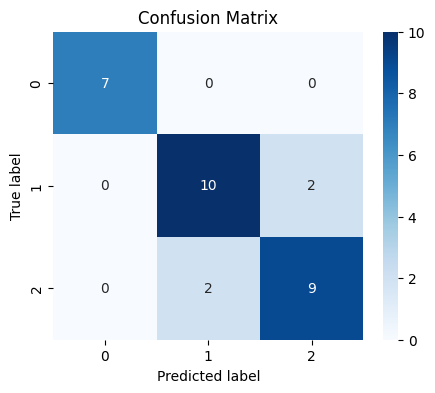

In [ ]:
#create a pandas DataFrame from the confusion matrix
classes = np.unique(Y_train)
cm_df = pd.DataFrame(cm, index=classes, columns=classes)

#Visualize the confusion matrix using seaborn
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


Kode ini digunakan untuk memvisualisasikan confusion matrix dari hasil prediksi model SVM pada data validasi. Pertama, daftar unik kelas target dari data pelatihan (Y_train) diambil menggunakan np.unique untuk digunakan sebagai label baris dan kolom dalam matriks. Lalu (cm) dikonversi menjadi DataFrame Pandas, dengan label kelas sebagai indeks (kelas sebenarnya) dan kolom (kelas prediksi).

Selanjutnya, heatmap dari matriks kebingungan dibuat menggunakan Seaborn. Heatmap ini menampilkan jumlah prediksi benar dan salah untuk setiap kombinasi kelas dengan angka di dalam sel matriks (annotasi) dan pewarnaan menggunakan palet biru untuk estetika. Sumbu Y diberi label "True label" (kelas sebenarnya) dan sumbu X diberi label "Predicted label" (kelas yang diprediksi), sementara judul "Confusion Matrix" menandai visualisasi ini.